In [1]:
import repyrt as rpt

rpt.local_settings['DEBUG'] = True

In [2]:
print(rpt.get_sql('test_sql'))

get_sql ('test_sql',) {}
ending get_sql ; time: 1.9073486328125e-06
test


In [3]:
props = rpt.acquire_data()

starting acquire_data
wrangle_zillow () {'db': 'zillow', 'sql': 'zillow_sql', 'sql_string': False}
starting get_db_url
ending get_db_url ; time: 5.245208740234375e-06
get_sql () {'sql': 'zillow_sql'}
ending get_sql ; time: 4.0531158447265625e-06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18639 entries, 0 to 18638
Data columns (total 62 columns):
bathroomcnt                     18639 non-null float64
bedroomcnt                      18639 non-null float64
calculatedfinishedsquarefeet    18639 non-null float64
taxvaluedollarcnt               18639 non-null float64
county                          18639 non-null object
tax_rate                        18639 non-null float64
id                              18639 non-null int64
parcelid                        18639 non-null int64
airconditioningtypeid           6547 non-null float64
airconditioningdesc             6547 non-null object
basementsqft                    12 non-null float64
buildingqualitytypeid           12842 non-null floa

In [4]:
# rpt.frame_splain(props, 'props')

In [5]:
#props[['regionidcity','tax_rate']].value_counts()

In [6]:
prep_props = rpt.edit_gross_df(props)

starting edit_gross_df
starting rename_fields
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18639 entries, 0 to 18638
Data columns (total 62 columns):
nbr_bedrms                    18639 non-null float64
nbr_bthrms                    18639 non-null float64
finished_sqft                 18639 non-null float64
taxable_value                 18639 non-null float64
county                        18639 non-null object
tax_rate                      18639 non-null float64
id                            18639 non-null int64
pid                           18639 non-null int64
airconditioningtypeid         6547 non-null float64
airconditioningdesc           6547 non-null object
basementsqft                  12 non-null float64
buildingqualitytypeid         12842 non-null float64
calculatedbathnbr             18633 non-null float64
decktypeid                    140 non-null float64
finishedfloor1squarefeet      1485 non-null float64
finishedsquarefeet12          18589 non-null float64
finishedsqu

In [7]:
#rpt.frame_splain(prep_props, 'prep_props')

In [8]:
prepped = rpt.edit_prep_df(prep_props)

starting edit_prep_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18639 entries, 0 to 18638
Data columns (total 4 columns):
nbr_bthrms       18639 non-null float64
nbr_bedrms       18639 non-null float64
finished_sqft    18639 non-null float64
taxable_value    18639 non-null float64
dtypes: float64(4)
memory usage: 582.5 KB
ending edit_prep_df ; time: 0.026365995407104492


In [9]:
# rpt.frame_splain(prepped, 'prepped')

In [10]:
context = rpt.find_context(context_df=prepped, scaler_fn=rpt.standard_scaler)
type(context)

starting find_context
starting set_context
starting split_my_data
ending split_my_data ; time: 0.006469249725341797
starting standard_scaler
starting scalem
ending scalem ; time: 0.008015871047973633
ending standard_scaler ; time: 0.02068495750427246
starting xy_df
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13979 entries, 3009 to 11290
Data columns (total 4 columns):
nbr_bthrms       13979 non-null float64
nbr_bedrms       13979 non-null float64
finished_sqft    13979 non-null float64
dummy_val        13979 non-null int64
dtypes: float64(3), int64(1)
memory usage: 546.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13979 entries, 3009 to 11290
Data columns (total 1 columns):
taxable_value    13979 non-null float64
dtypes: float64(1)
memory usage: 218.4 KB
ending xy_df ; time: 0.025435209274291992
starting xy_df
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4660 entries, 16907 to 8278
Data columns (total 3 columns):
nbr_bthrms       4660 non-null float64
nbr_bedrms    

split_scale.Context

In [17]:
X_train = context.X_train
# print(X_train.shape)
y_train = context.y_train
# print(y_train.shape)
train = X_train.join(y_train)
# print(train.shape)

# print(train.taxable_value.value_counts().idxmax())
# print(train.taxable_value.value_counts().idxmin())


(13979, 4)
(13979, 1)
(13979, 5)
550000.0
84653.0


starting pairplot_train


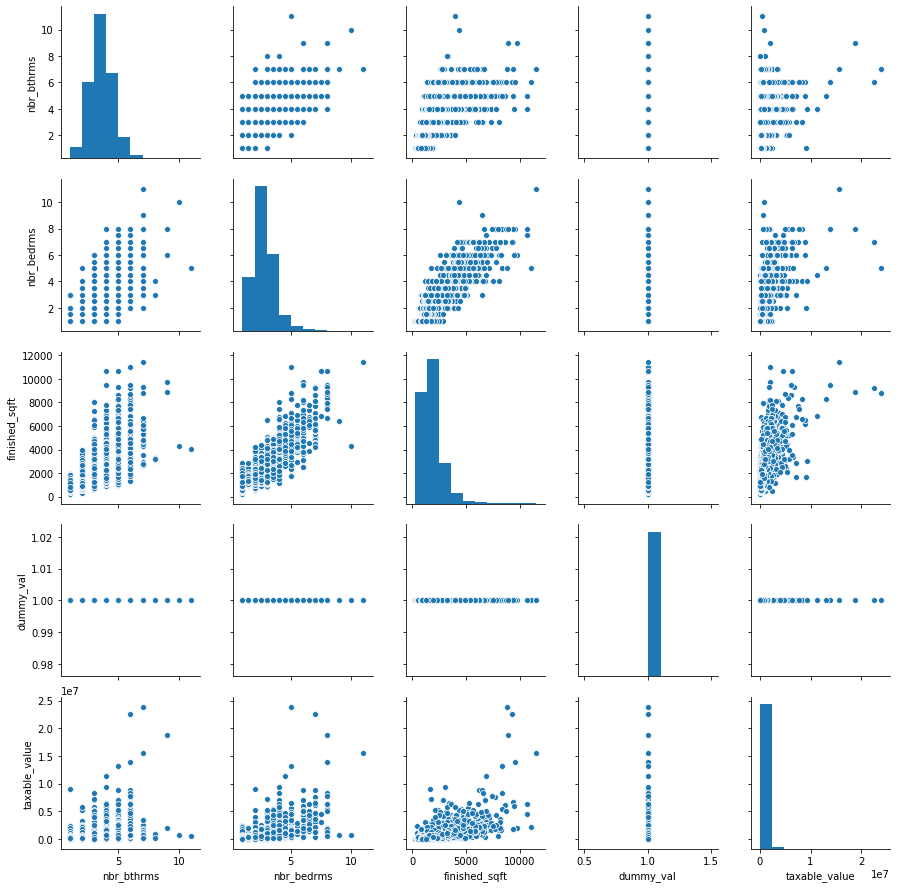

ending pairplot_train ; time: 11.9881911277771


In [12]:
rpt.pairplot_train(train)

starting heatmap_train


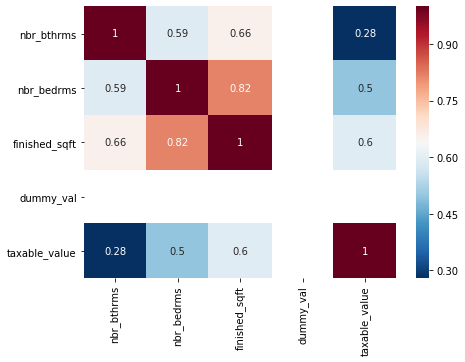

ending heatmap_train ; time: 0.3488118648529053


In [13]:
rpt.heatmap_train(train)

In [18]:
#r2_lm1 = rpt.r2_score(y_train,train.yhat)
#r2_lm1

In [ ]:
#creating baseline with mean of tax value
train['tax_mean'] = train.taxable_value.mean()
train.head()

In [ ]:
#creating residual of tax value vs expected tax value
train['residual'] = train['yhat'] - train['taxable_value']
train['residual2'] = train.residual **2
train.head()

## MVP

In [ ]:

from sklearn.linear_model import LinearRegression
#pick model type, Linear Regression for the MVP baseline
lm1 = LinearRegression()

In [ ]:
#fit and train model
lm1.fit(X_train,y_train)
lm1_y_intercept = lm1.intercept_
lm1_coefficients = lm1.coef_

print('{} = b + m1 * {} + m2 * {}'.format(y_train.columns[0], X_train.columns[0],X_train.columns[1]))
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][1])

In [ ]:

#converting y_train to panda series
y_train = y_train.taxable_value

In [ ]:
#Plotting residuals
sns.residplot(y_train,train.yhat)

In [ ]:
#MSE, SSE, RMSE
import math
sse = sum(train.residual2)
mse = sse/len(train)
rmse = math.sqrt(mse)
r2 = ols_model.rsquared
print(sse,mse,rmse,r2)